In [1]:
from pyspark.sql import SparkSession

from pyspark.sql.functions import *
from pyspark.sql.types import *

spark = SparkSession \
    .builder \
    .appName("how to read csv file") \
    .enableHiveSupport() \
    .getOrCreate()


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


2023-11-26T12:54:11,660 WARN [Thread-4] org.apache.hadoop.util.NativeCodeLoader - Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
refined_monthly_pays = spark.sql("select * from obligatorio.refined_monthly_pays")


2023-11-26T12:54:18,094 INFO [Thread-4] org.apache.hadoop.hive.conf.HiveConf - Found configuration file file:/home/ort/spark/conf/hive-site.xml
2023-11-26T12:54:18,500 WARN [Thread-4] org.apache.hadoop.hive.conf.HiveConf - HiveConf of name hive.metastore.wm.default.pool.size does not exist
2023-11-26T12:54:18,500 WARN [Thread-4] org.apache.hadoop.hive.conf.HiveConf - HiveConf of name hive.llap.task.scheduler.preempt.independent does not exist
2023-11-26T12:54:18,500 WARN [Thread-4] org.apache.hadoop.hive.conf.HiveConf - HiveConf of name hive.llap.output.format.arrow does not exist
2023-11-26T12:54:18,500 WARN [Thread-4] org.apache.hadoop.hive.conf.HiveConf - HiveConf of name hive.tez.llap.min.reducer.per.executor does not exist
2023-11-26T12:54:18,500 WARN [Thread-4] org.apache.hadoop.hive.conf.HiveConf - HiveConf of name hive.arrow.root.allocator.limit does not exist
2023-11-26T12:54:18,500 WARN [Thread-4] org.apache.hadoop.hive.conf.HiveConf - HiveConf of name hive.vectorized.use.che

In [3]:
refined_monthly_pays.show()

+-------+----+----------------+--------------+-------------+---------------------+-----------------------------+
|user_id|plan|mensual_cost_usd|local_currency|      country|has_monthly_purchases|purchase_value_local_currency|
+-------+----+----------------+--------------+-------------+---------------------+-----------------------------+
|    783|   B|             113|       Afghani|  Afghanistan|                 true|                       1209.0|
|    829|   C|             140|       Afghani|  Afghanistan|                false|                          0.0|
|    835|   D|             100|       Afghani|  Afghanistan|                 true|                      2785.16|
|    412|   C|              36|          Euro|Aland Islands|                 true|                      2320.89|
|     67|   B|             149|           Lek|      Albania|                 true|                      1535.58|
|    104|   D|              48|           Lek|      Albania|                 true|              

In [4]:
refined_monthly_pays.printSchema()

root
 |-- user_id: string (nullable = true)
 |-- plan: string (nullable = true)
 |-- mensual_cost_usd: integer (nullable = true)
 |-- local_currency: string (nullable = true)
 |-- country: string (nullable = true)
 |-- has_monthly_purchases: boolean (nullable = true)
 |-- purchase_value_local_currency: float (nullable = true)



In [5]:
refined_fecha = spark.sql("select * from obligatorio.refined_fecha")

In [6]:
refined_fecha.show()

+---+----------+----------+
| id|fecha_alta|fecha_baja|
+---+----------+----------+
|  1|2021-06-02|      null|
|  2|2021-06-02|      null|
|  3|2021-06-03|      null|
|  4|2021-06-03|2022-03-13|
|  5|2021-06-04|2023-11-05|
|  6|2021-06-04|2022-07-03|
|  7|2021-06-05|      null|
|  8|2021-06-08|      null|
|  9|2021-06-09|      null|
| 10|2021-06-11|      null|
| 11|2021-06-12|      null|
| 12|2021-06-12|      null|
| 13|2021-06-13|      null|
| 14|2021-06-13|      null|
| 15|2021-06-15|      null|
| 16|2021-06-15|      null|
| 17|2021-06-16|      null|
| 18|2021-06-16|      null|
| 19|2021-06-18|      null|
| 20|2021-06-19|      null|
+---+----------+----------+
only showing top 20 rows



In [7]:
refined_plans = spark.sql("select * from obligatorio.refined_plans")

In [8]:
refined_plans.show()

+----+--------+----------+
|plan|  nombre|created_at|
+----+--------+----------+
|   A|   Basic|2021-01-04|
|   B|Original|2021-01-08|
|   C|  Family|2021-01-02|
|   D| Premium|2021-01-02|
+----+--------+----------+



In [9]:
refined_users = spark.sql("select * from obligatorio.refined_users")

In [10]:
refined_users.show()

2023-11-26T12:54:28,681 WARN [Executor task launch worker for task 0.0 in stage 3.0 (TID 3)] org.apache.hadoop.hive.serde2.lazy.LazyStruct - Extra bytes detected at the end of the row! Ignoring similar problems.
+-------+----------+-----------+--------------------+-----------+---+---------------------------+-------------------------+
|user_id|first_name|  last_name|               email|     gender|age|principal_sport_of_interest|principal_sport_frecuency|
+-------+----------+-----------+--------------------+-----------+---+---------------------------+-------------------------+
|      1|      Alic|    Kaemena|akaemena0@4shared...|       Male| 18|                 Senderismo|                 Handball|
|      2|    Dorrie|   Fountian|dfountian1@craigs...|     Female| 51|                    Running|               Senderismo|
|      3|   Spenser|  Fernandes|sfernandes2@devhu...|       Male| 31|                   Natación|                   Tennis|
|      4|    Andris|    Moakson|amoakson3@re

#### ¿Cuáles son las actividades más requeridas?

In [11]:
spark.sql("""
    SELECT principal_sport_of_interest,
    COUNT (DISTINCT user_id) as users_by_sports
    FROM obligatorio.refined_users
    GROUP BY principal_sport_of_interest
    ORDER BY users_by_sports DESC
""").show(truncate=False)

2023-11-26T12:54:29,906 WARN [Executor task launch worker for task 0.0 in stage 4.0 (TID 4)] org.apache.hadoop.hive.serde2.lazy.LazyStruct - Extra bytes detected at the end of the row! Ignoring similar problems.
+---------------------------+---------------+
|principal_sport_of_interest|users_by_sports|
+---------------------------+---------------+
|Running                    |112            |
|Tennis                     |105            |
|Ciclismo                   |105            |
|Natación                   |104            |
|Senderismo                 |99             |
|Fútbol                     |99             |
|Rafting                    |98             |
|Handball                   |95             |
|Trecking                   |93             |
|Volley                     |90             |
+---------------------------+---------------+



#### ¿Cuál es la evolución mensual en cuanto a cantidad de nuevos usuarios y cual fue la distribución del ingreso por plan en el último mes?
*Se asume que la información de la tabla monthly_pays corresponde al último mes de analisis.*

##### Evolución a nivel de nuevos usuarios.

In [12]:
spark.sql("""
    SELECT TRUNC(fecha_alta,'MM') as mes_alta,
    COUNT(DISTINCT id) as users
    FROM obligatorio.refined_fecha
    GROUP BY 1
    ORDER BY mes_alta ASC
""").show(truncate=False)

+----------+-----+
|mes_alta  |users|
+----------+-----+
|2021-06-01|43   |
|2021-07-01|73   |
|2021-08-01|66   |
|2021-09-01|52   |
|2021-10-01|80   |
|2021-11-01|71   |
|2021-12-01|49   |
|2022-01-01|44   |
|2022-02-01|56   |
|2022-03-01|39   |
|2022-04-01|48   |
|2022-05-01|34   |
|2022-06-01|52   |
|2022-07-01|38   |
|2022-08-01|24   |
|2022-09-01|28   |
|2022-10-01|27   |
|2022-11-01|21   |
|2022-12-01|30   |
|2023-01-01|28   |
+----------+-----+
only showing top 20 rows



##### Evolución a nivel de ingresos por plan.

In [13]:
spark.sql("""
    SELECT p.nombre as plan,
    SUM(m.mensual_cost_usd) as revenue
    FROM obligatorio.refined_monthly_pays as m
    LEFT JOIN obligatorio.refined_plans as p on p.plan = m.plan
    GROUP BY p.nombre
""").show(truncate=False)

+--------+-------+
|plan    |revenue|
+--------+-------+
|Premium |22816  |
|Original|23990  |
|Family  |22600  |
|Basic   |22776  |
+--------+-------+



#### Visualizaciones

2023-11-26T12:54:34,956 WARN [Executor task launch worker for task 0.0 in stage 20.0 (TID 13)] org.apache.hadoop.hive.serde2.lazy.LazyStruct - Extra bytes detected at the end of the row! Ignoring similar problems.


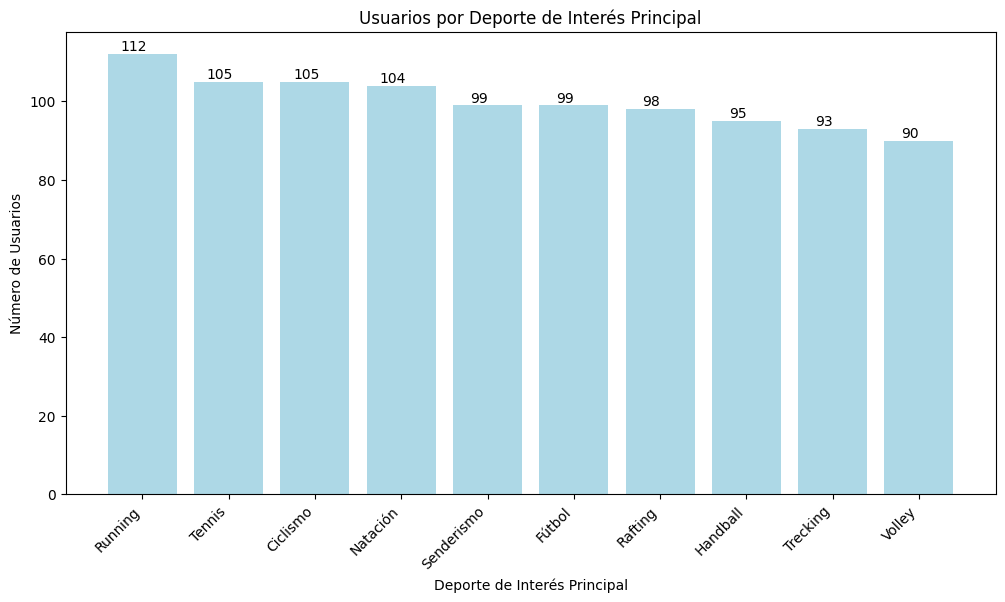

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

result_df = spark.sql("""
    SELECT principal_sport_of_interest,
    COUNT(DISTINCT user_id) as users_by_sports
    FROM obligatorio.refined_users
    GROUP BY principal_sport_of_interest
    ORDER BY users_by_sports DESC
""").toPandas()

plt.figure(figsize=(12, 6))
bars = plt.bar(result_df['principal_sport_of_interest'], result_df['users_by_sports'], color='lightblue')
plt.xlabel('Deporte de Interés Principal')
plt.ylabel('Número de Usuarios')
plt.title('Usuarios por Deporte de Interés Principal')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x para mayor legibilidad


for bar, label in zip(bars, result_df['users_by_sports']):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.1, label, ha='center', va='bottom')

plt.show()

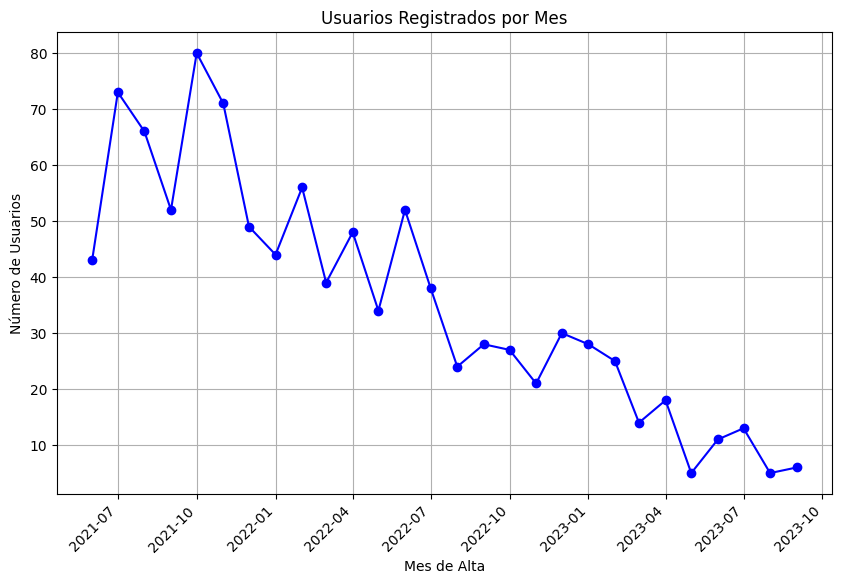

In [15]:
result_df = spark.sql("""
    SELECT TRUNC(fecha_alta,'MM') as mes_alta,
    COUNT(DISTINCT id) as users
    FROM obligatorio.refined_fecha
    GROUP BY 1
    ORDER BY mes_alta ASC
""").toPandas()

plt.figure(figsize=(10, 6))
plt.plot(result_df['mes_alta'], result_df['users'], marker='o', linestyle='-', color='b')
plt.xlabel('Mes de Alta')
plt.ylabel('Número de Usuarios')
plt.title('Usuarios Registrados por Mes')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x para mayor legibilidad
plt.grid(True)
plt.show()

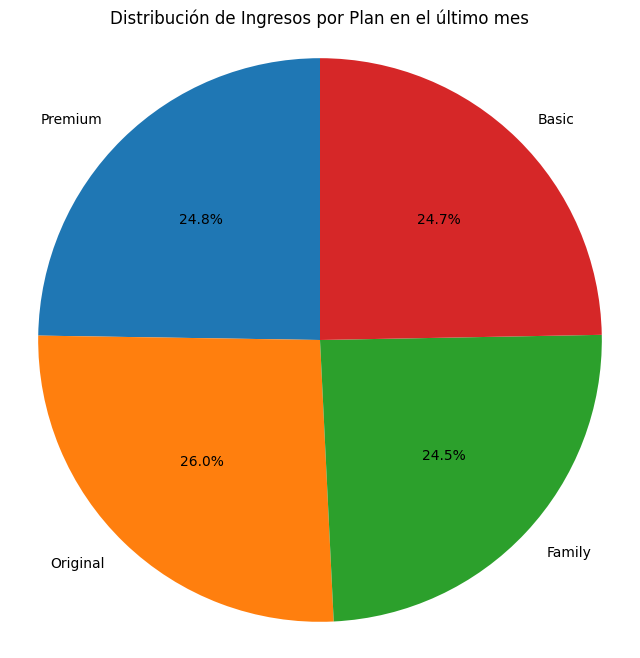

In [16]:
result_df = spark.sql("""
    SELECT p.nombre as plan,
    SUM(m.mensual_cost_usd) as revenue
    FROM obligatorio.refined_monthly_pays as m
    LEFT JOIN obligatorio.refined_plans as p on p.plan = m.plan
    GROUP BY p.nombre
""").toPandas()

plt.figure(figsize=(8, 8))
plt.pie(result_df['revenue'], labels=result_df['plan'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')  
plt.title('Distribución de Ingresos por Plan en el último mes')
plt.show()
